
**PLANT CLASSIFICATION AND DIAGNOSE DETECTION WITH DEEP LEARNING**


In this project, the leaves of the plants will be identified and their diseases will be determined by using the deep learning-based selected method.

1- DATASET CLEANING AND PREPARATION

2- MODEL TRAINING TO DEFINE PLANTS' LEAVES

3- LEAF IDENTIFICATION MODEL TEST

4- DETERMINING THE TYPE OF A SINGLE LEAF GIVEN TO THE MODEL

5- EDUCATION OF DISEASE IDENTIFICATION MODELS

6- TEST OF DISEASE IDENTIFICATION MODELS

7- DETERMINING THE TYPE OF A SINGLE LEAF GIVEN TO THE MODEL



+ Inclusion of Another Deep Learning Method in the Program

Google Drive Import
=============================

In this secion we import and mount Google Drive to access the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd drive/MyDrive/bitirme

/content/drive/.shortcut-targets-by-id/1Z6YBRb4mrmupfNeWdQPmGLh-GlbSfxuY/bitirme


In [4]:
%matplotlib inline

In [5]:
#Unzip the downloaded file
#!unzip -q DB1.zip

Data Division
=============================

In this section we divide the dataset DB1 into train and test folders.

0.8 train size and 0.2 test size

In [ ]:
'''
# veriyi dagitma kodu
import os 
import random

from glob import glob 
from tqdm import tqdm 
for fruit in tqdm(os.listdir('DB2')):
  fruit_path = os.path.join('DB2', fruit )
  for fruit_class in glob(fruit_path+ '/*'):
    print(fruit_class)

    images = glob(fruit_class + '/*')
    random.shuffle(images)

    train_size = int(len(images) * 0.8)

    train = images[:train_size]
    test = images[train_size:]
    print(fruit_path)
    print(fruit_class)
    print(fruit_class.replace(fruit_path, f'{fruit_path}/train'))
    print('======')
    os.makedirs(fruit_class.replace(fruit_path, f'{fruit_path}/train'),exist_ok=True)
    os.makedirs(fruit_class.replace(fruit_path, f'{fruit_path}/test/'),exist_ok=True)
  
    [os.rename(i,i.replace(fruit+'/',f'{fruit}/test/')) for i in test]
    [os.rename(i,i.replace(fruit+'/',f'{fruit}/train/')) for i in train]
    #[os.rename(i,i.replace('DB1/','DB1/train/')) for i in train]
    


  0%|          | 0/4 [00:00<?, ?it/s]

DB2/Apple/Apple___Apple_scab
DB2/Apple
DB2/Apple/Apple___Apple_scab
DB2/Apple/train/Apple___Apple_scab
DB2/Apple/Apple___Black_rot
DB2/Apple
DB2/Apple/Apple___Black_rot
DB2/Apple/train/Apple___Black_rot
DB2/Apple/Apple___Cedar_apple_rust
DB2/Apple
DB2/Apple/Apple___Cedar_apple_rust
DB2/Apple/train/Apple___Cedar_apple_rust


 25%|██▌       | 1/4 [00:03<00:09,  3.07s/it]

DB2/Corn/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
DB2/Corn
DB2/Corn/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
DB2/Corn/train/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
DB2/Corn/Corn_(maize)___Common_rust_
DB2/Corn
DB2/Corn/Corn_(maize)___Common_rust_
DB2/Corn/train/Corn_(maize)___Common_rust_
DB2/Corn/Corn_(maize)___Northern_Leaf_Blight
DB2/Corn
DB2/Corn/Corn_(maize)___Northern_Leaf_Blight
DB2/Corn/train/Corn_(maize)___Northern_Leaf_Blight


 50%|█████     | 2/4 [00:07<00:07,  3.83s/it]

DB2/Grape/Grape___Black_rot
DB2/Grape
DB2/Grape/Grape___Black_rot
DB2/Grape/train/Grape___Black_rot
DB2/Grape/Grape___Esca_(Black_Measles)
DB2/Grape
DB2/Grape/Grape___Esca_(Black_Measles)
DB2/Grape/train/Grape___Esca_(Black_Measles)
DB2/Grape/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
DB2/Grape
DB2/Grape/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
DB2/Grape/train/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)


 75%|███████▌  | 3/4 [00:09<00:02,  2.83s/it]

DB2/Tomato/Tomato___Septoria_leaf_spot
DB2/Tomato
DB2/Tomato/Tomato___Septoria_leaf_spot
DB2/Tomato/train/Tomato___Septoria_leaf_spot
DB2/Tomato/Tomato___Spider_mites Two-spotted_spider_mite
DB2/Tomato
DB2/Tomato/Tomato___Spider_mites Two-spotted_spider_mite
DB2/Tomato/train/Tomato___Spider_mites Two-spotted_spider_mite
DB2/Tomato/Tomato___Tomato_Yellow_Leaf_Curl_Virus
DB2/Tomato
DB2/Tomato/Tomato___Tomato_Yellow_Leaf_Curl_Virus
DB2/Tomato/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus


100%|██████████| 4/4 [00:15<00:00,  3.80s/it]


Second Section of the Project with AlexNet
=================================================

In this section we have complished the second section of the project.

We trained a deep learning model with Alexnet. After finding the type of the plant as unhealhy we can pass second part.

In this part, we have 4 seperate models for each plant type. After training each model we got accuracy and loss of models too.

In the sample usage of the model, it gets an unhealty plant photo and it sends this photo to the model of that plant. And finally, model returns the disease of this plant.

Import Necessary Libraries
--------------------------

In this section we import the necessary libraries

In [6]:
from __future__ import print_function 
from __future__ import division
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import pickle
print("PyTorch Version: ",torch.__version__)
print("Torchvision Version: ",torchvision.__version__)

PyTorch Version:  1.10.0+cu111
Torchvision Version:  0.11.1+cu111


**PLANT DISEASE DETECTION MODEL CREATE FUNCTION**
=================================================

In [7]:
def create_model(plant_name):
    #INPUTS************************************************************************************************************************************
    data_dir =  "./DB2/" + plant_name
    model_name = "alexnet"
    num_classes = 3
    batch_size = 512
    num_epochs = 20
    feature_extract = True

    #HELPER FUNCTIONS**************************************************************************************************************************
    def set_parameter_requires_grad(model, feature_extracting):
       if feature_extracting:
           for param in model.parameters():
               param.requires_grad = False

    #INITIALIZE AND RESHAPE THE ALEXNET NETWORK************************************************************************************************
    def initialize_model(model_name, num_classes, feature_extract, use_pretrained=True):
       # Initialize these variables which will be set in this if statement. Each of these
        #   variables is model specific.
        model_ft = None
        input_size = 0

        if model_name == "alexnet":
            """ Alexnet
            """
            model_ft = models.alexnet(pretrained=use_pretrained)
            set_parameter_requires_grad(model_ft, feature_extract)
            num_ftrs = model_ft.classifier[6].in_features
            model_ft.classifier[6] = nn.Linear(num_ftrs,num_classes)
            input_size = 224

        else:
            print("Invalid model name, exiting...")
            exit()
    
        return model_ft, input_size

    # Initialize the model for this run
    model_ft, input_size = initialize_model(model_name, num_classes, feature_extract, use_pretrained=True)

    # Print the model we just instantiated
    print(model_ft)

    #LOAD DATA********************************************************************************************************************************
    # Data augmentation and normalization for training
    # Just normalization for validation
    data_transforms = {
      'train': transforms.Compose([
          transforms.RandomResizedCrop(input_size),
          transforms.RandomHorizontalFlip(),
          transforms.ToTensor(),
          transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
      ]),
        'test': transforms.Compose([
            transforms.Resize(input_size),
          transforms.CenterCrop(input_size),
          transforms.ToTensor(),
          transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
    }

    print("Initializing Datasets and Dataloaders...")

    # Create training and validation datasets
    image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'test']}
    # Create training and validation dataloaders
    dataloaders_dict = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=4) for x in ['train', 'test']}
    print('path', data_dir)

    import json
    id2lab= {i:class_name for i,class_name in enumerate(dataloaders_dict['train'].dataset.classes)}
    lab2id = {class_name : i for i , class_name  in id2lab.items()}
    print ("Classes:", id2lab)

    dataloaders_dict['train']


    # Detect if we have a GPU available
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

    image_datasets


    #CREATE OPTIMIZER************************************************************************************************************************
    # Send the model to GPU
    model_ft = model_ft.to(device)

    # Gather the parameters to be optimized/updated in this run. If we are
    #  finetuning we will be updating all parameters. However, if we are 
    #  doing feature extract method, we will only update the parameters
    #  that we have just initialized, i.e. the parameters with requires_grad
    #  is True.
    params_to_update = model_ft.parameters()
    print("Params to learn:")
    if feature_extract:
       params_to_update = []
       for name,param in model_ft.named_parameters():
           if param.requires_grad == True:
              params_to_update.append(param)
              print("\t",name)
    else:
        for name,param in model_ft.named_parameters():
           if param.requires_grad == True:
                print("\t",name)

    # Observe that all parameters are being optimized
    optimizer_ft = optim.SGD(params_to_update, lr=0.001, momentum=0.9)


    #RUN TRAINING AND VALIDATION STEP
    print('Running Training and Validation')
    from sklearn.model_selection import KFold
    def train_model(model, dataloaders, criterion, optimizer, num_epochs=25):

        since = time.time()

        val_acc_history = []
        val_loss_history = []
        best_model_wts = copy.deepcopy(model.state_dict())
        best_acc = 0.0
        train_acc_history = [] 
        train_loss_history = [] 
        for epoch in range(num_epochs):
            print('Epoch {}/{}'.format(epoch+1, num_epochs))
            print('-' * 10)

            # Each epoch has a training and validation phase
            for phase in ['train', 'val']:
                if phase == 'train':
                    model.train()  # Set model to training mode
                else:
                    model.eval()   # Set model to evaluate mode

                running_loss = 0.0
                running_corrects = 0

                # Iterate over data.
                for inputs, labels in dataloaders[phase]:
                    inputs = inputs.to(device)
                    labels = labels.to(device)

                    # zero the parameter gradients
                    optimizer.zero_grad()

                    # forward
                    # track history if only in train
                    with torch.set_grad_enabled(phase == 'train'):
                        # Get model outputs and calculate loss

                        outputs = model(inputs)
                        loss = criterion(outputs, labels)
                        _, preds = torch.max(outputs, 1)

                        # backward + optimize only if in training phase
                        if phase == 'train':
                            loss.backward()
                            optimizer.step()

                    # statistics
                    running_loss += loss.item() * inputs.size(0)
                    running_corrects += torch.sum(preds == labels.data)

                epoch_loss = running_loss / len(dataloaders[phase].dataset)
                # epoch_loss = epoch_loss.detach().cpu().numpy()
                epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)
                # epoch_acc = epoch_acc.detach().cpu().numpy()

                print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

                # deep copy the model
                if phase == 'val' and epoch_acc > best_acc:
                    best_acc = epoch_acc
                    best_model_wts = copy.deepcopy(model.state_dict())
                if phase == 'val':
                    val_acc_history.append(epoch_acc)
                    val_loss_history.append(epoch_loss)
                if phase == 'train':
                  train_acc_history.append(epoch_acc)
                  train_loss_history.append(epoch_loss)
            print()

        time_elapsed = time.time() - since
        print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
        print('Best val Acc: {:4f}'.format(best_acc))

        # load best model weights
        model.load_state_dict(best_model_wts)
        return model, val_acc_history , val_loss_history, train_acc_history, train_loss_history
    #*********************************************************************************************************
    # Setup the loss fxn
    criterion = nn.CrossEntropyLoss()

    # Train and evaluate
    from sklearn.model_selection import KFold
    n_fold = 5
    kfold=KFold(n_splits=n_fold,shuffle=True)



    initial_state = copy.deepcopy(model_ft.state_dict()) # Modelin ilk state


    average_loss = 0 
    best_loss = None
    model_folder = '/content/drive/MyDrive/bitirme/DB2_MODELS'
    saved_model = None

    for fold,(train_idx,val_idx) in enumerate(kfold.split(image_datasets['train'])):
      print()
      print('Fold {}/{}'.format(fold+1, n_fold))
      print('=' * 20)
      train_subsampler = torch.utils.data.SubsetRandomSampler(train_idx)
      val_subsampler = torch.utils.data.SubsetRandomSampler(val_idx)

      trainloader = torch.utils.data.DataLoader(
                          image_datasets['train'], 
                          batch_size=batch_size, sampler=train_subsampler)
      valloader = torch.utils.data.DataLoader(
                          image_datasets['train'],
                          batch_size=batch_size, sampler=val_subsampler)
      model_ft.load_state_dict(initial_state)

      model_ft, val_acc_history , val_loss_history,train_acc_history,train_loss_history = train_model(model_ft,{'train' : trainloader , 'val' :valloader } , criterion, optimizer_ft, num_epochs=num_epochs)
      fold_loss = np.average(val_loss_history)
      average_loss += fold_loss
      if best_loss== None or fold_loss < best_loss:
        best_loss = fold_loss
        saved_model= copy.deepcopy(model_ft.state_dict())
      
      
    print()
    print('Average Loss = ', average_loss / n_fold )
    print()
    #torch.save(saved_model.state_dict(), 'saved_model' + model_name)

    #SAVING MODEL
    directory=model_name + plant_name
    path=os.path.join(model_folder, directory)
    os.makedirs(path , exist_ok=True)
    torch.save(saved_model, os.path.join(path , 'pytorch_model.bin'))
    import pickle 
    with open(os.path.join(path , 'labels.pkl') , 'wb') as fp :
      pickle.dump([id2lab,lab2id] , fp)
    print()
    print('Model is saved:', directory)
    print('=' * 20)
    print()
    

    #VALIDATION AND TRAIN PLOTS
    #TRAIN LOSS
    plt.figure(figsize=(10,5))
    plt.title("Train Loss")
    plt.plot(train_loss_history,label="Train")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
    #TRAIN ACC
    plt.figure(figsize=(10,5))
    plt.title("Train Acc")
    plt.plot(train_acc_history,label="Train")
    plt.xlabel("Epochs")
    plt.ylabel("Acc")
    plt.legend()
    plt.show()
    #VAL LOSS
    plt.figure(figsize=(10,5))
    plt.title("Validation Loss")
    plt.plot(val_loss_history,label="Val")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
    #VAL ACC
    plt.figure(figsize=(10,5))
    plt.title("Validation Acc")
    plt.plot(val_acc_history,label="Val")
    plt.xlabel("Epochs")
    plt.ylabel("Acc")
    plt.legend()
    plt.show()



    ##TESTING STEP
    model_folder = '/content/drive/MyDrive/bitirme/DB2_MODELS/' + model_name + plant_name
    model_ft.load_state_dict(torch.load(os.path.join(model_folder , 'pytorch_model.bin')))
    print('Model has been loaded')
    print('<All keys matched successfully>')
    with open(os.path.join(model_folder , 'labels.pkl') , 'rb') as fp :
      id2lab,lab2id = pickle.load(fp)
    
    model_ft.eval()

    since = time.time()
    val_acc_history = []
    val_loss_history = []
    best_acc = 0.0


    running_loss = 0.0
    running_corrects = 0

    # Iterate over data.
    for inputs, labels in dataloaders_dict['test']:
        inputs = inputs.to(device)
        labels = labels.to(device)
        # track history if only in train
        with torch.set_grad_enabled(False):
            outputs = model_ft(inputs)
            _, preds = torch.max(outputs, 1)
        running_corrects += torch.sum(preds == labels.data)
    running_corrects
    len(dataloaders_dict['test'])
    result=running_corrects / len( dataloaders_dict['test'])
    print('Result', result)

**APPLE DISEASE DETECTION MODEL**
=================================================

This dataset contains 3 classes of apple diseases:
1. Apple___Apple_scab
2. Apple___Black_rot
3. Apple___Cedar_apple_rust

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch 1/20
----------
train Loss: 1.0246 Acc: 0.2864
val Loss: 0.2081 Acc: 0.0909

Epoch 2/20
----------
train Loss: 0.8583 Acc: 0.3273
val Loss: 0.1829 Acc: 0.1121

Epoch 3/20
----------
train Loss: 0.8232 Acc: 0.3621
val Loss: 0.1544 Acc: 0.1227

Epoch 4/20
----------
train Loss: 0.6291 Acc: 0.5121
val Loss: 0.1407 Acc: 0.1424

Epoch 5/20
----------
train Loss: 0.5229 Acc: 0.6121
val Loss: 0.1382 Acc: 0.1364

Epoch 6/20
----------
train Loss: 0.4452 Acc: 0.6333
val Loss: 0.1004 Acc: 0.1667

Epoch 7/20
----------
train Loss: 0.3823 Acc: 0.6545
val Loss: 0.0817 Acc: 0.1682

Epoch 8/20
----------
train Loss: 0.3546 Acc: 0.6697
val Loss: 0.0675 Acc: 0.1758

Epoch 9/20
----------
train Loss: 0.3494 Acc: 0.6591
val Loss: 0.0713 Acc: 0.1727

Epoch 10/20
----------
train Loss: 0.3241 Acc: 0.6561
val Loss: 0.0574 Acc: 0.1788

Epoch 11/20
----------
train Loss: 0.3031 Acc: 0.6727
val Loss: 0.0740 Acc: 0.1727

Epoch 12/20
----------
train Loss: 0.3058 Acc: 0.6803
val Loss: 0.0634 Acc: 0.1742

E

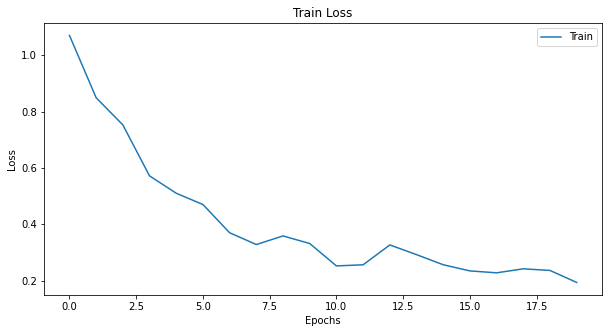

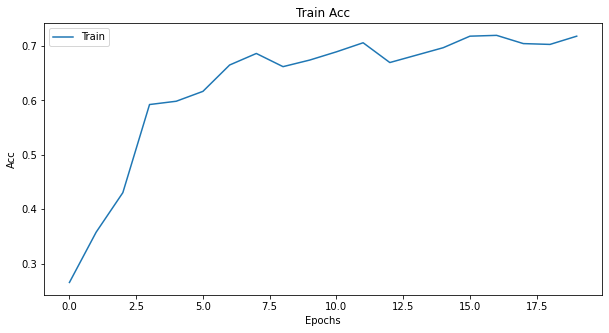

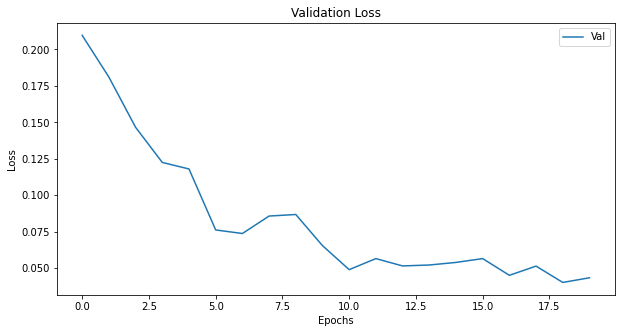

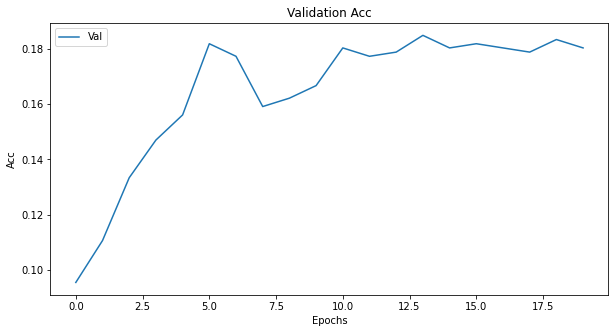

Model has been loaded
<All keys matched successfully>
Result tensor(152.)


In [ ]:
model_ft=create_model('Apple')

**CORN(MAIZE) DISEASE DETECTION MODEL**
=================================================

This dataset contains 3 classes of corn diseases:
1. Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
2. Corn_(maize)___Common_rust_
3. Corn_(maize)___Northern_Leaf_Blight

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


path ./DB2/Corn
Classes: {0: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 1: 'Corn_(maize)___Common_rust_', 2: 'Corn_(maize)___Northern_Leaf_Blight'}
Params to learn:
	 classifier.6.weight
	 classifier.6.bias
Running Training and Validation

Fold 1/5
Epoch 1/20
----------
train Loss: 0.9062 Acc: 0.2880
val Loss: 0.2002 Acc: 0.0982

Epoch 2/20
----------
train Loss: 0.7670 Acc: 0.4229
val Loss: 0.1576 Acc: 0.1165

Epoch 3/20
----------
train Loss: 0.6036 Acc: 0.5178
val Loss: 0.1309 Acc: 0.1370

Epoch 4/20
----------
train Loss: 0.4705 Acc: 0.6106
val Loss: 0.1154 Acc: 0.1467

Epoch 5/20
----------
train Loss: 0.4167 Acc: 0.6235
val Loss: 0.0972 Acc: 0.1489

Epoch 6/20
----------
train Loss: 0.3923 Acc: 0.6343
val Loss: 0.1002 Acc: 0.1553

Epoch 7/20
----------
train Loss: 0.3769 Acc: 0.6429
val Loss: 0.0905 Acc: 0.1672

Epoch 8/20
----------
train Loss: 0.3534 Acc: 0.6559
val Loss: 0.0853 Acc: 0.1607

Epoch 9/20
----------
train Loss: 0.3311 Acc: 0.6667
val Loss: 0.0869 Acc: 0

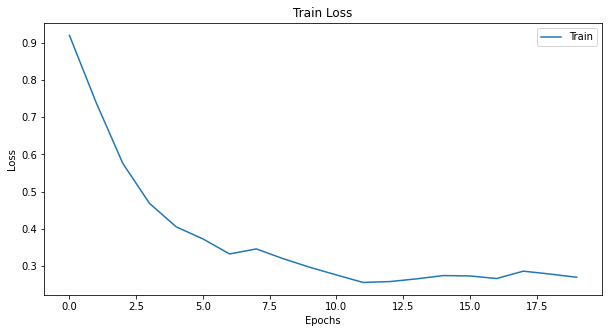

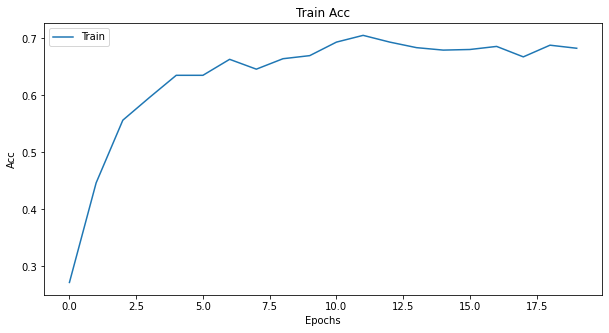

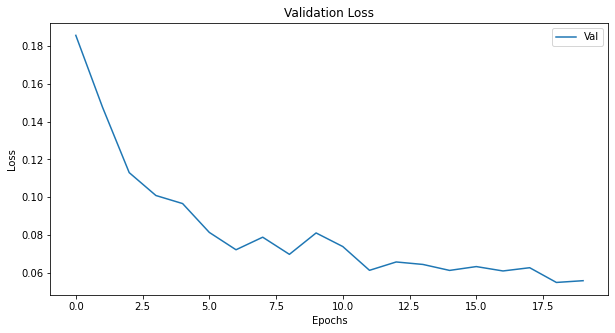

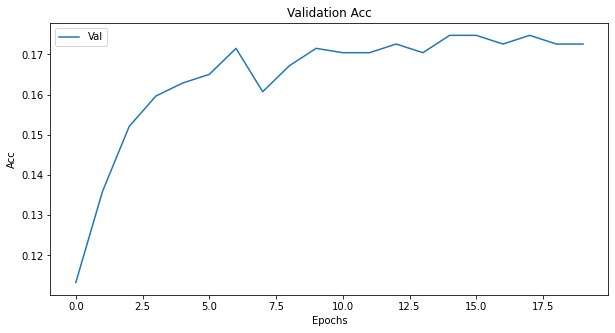

Model has been loaded
<All keys matched successfully>


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Result tensor(191.)


In [8]:
model_ft=create_model('Corn')

**GRAPE DISEASE DETECTION MODEL**
=================================================

This dataset contains 3 classes of grape diseases:
1. Grape___Black_rot
2. Grape___Esca_(Black_Measles)
3. Grape___Leaf_blight_(Isariopsis_Leaf_Spot)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


train Loss: 0.9836 Acc: 0.2202
val Loss: 0.2242 Acc: 0.0714

Epoch 2/20
----------
train Loss: 0.9081 Acc: 0.2976
val Loss: 0.1975 Acc: 0.1101

Epoch 3/20
----------
train Loss: 0.8460 Acc: 0.3393
val Loss: 0.1837 Acc: 0.1220

Epoch 4/20
----------
train Loss: 0.7313 Acc: 0.4554
val Loss: 0.1536 Acc: 0.1429

Epoch 5/20
----------
train Loss: 0.6445 Acc: 0.5298
val Loss: 0.1339 Acc: 0.1458

Epoch 6/20
----------
train Loss: 0.5648 Acc: 0.6042
val Loss: 0.1061 Acc: 0.1637

Epoch 7/20
----------
train Loss: 0.4634 Acc: 0.6548
val Loss: 0.1151 Acc: 0.1458

Epoch 8/20
----------
train Loss: 0.4172 Acc: 0.6518
val Loss: 0.0961 Acc: 0.1637

Epoch 9/20
----------
train Loss: 0.3996 Acc: 0.6458
val Loss: 0.0954 Acc: 0.1607

Epoch 10/20
----------
train Loss: 0.3749 Acc: 0.6399
val Loss: 0.0791 Acc: 0.1696

Epoch 11/20
----------
train Loss: 0.3507 Acc: 0.6726
val Loss: 0.0853 Acc: 0.1518

Epoch 12/20
----------
train Loss: 0.2853 Acc: 0.6964
val Loss: 0.0772 Acc: 0.1726

Epoch 13/20
----------


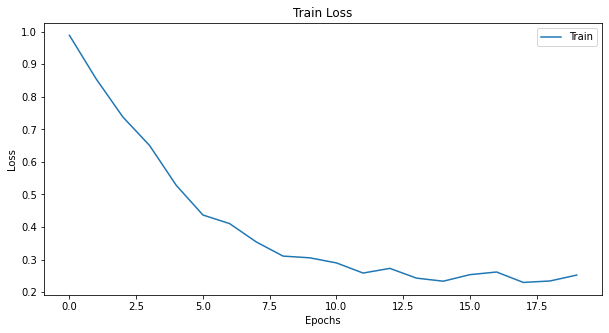

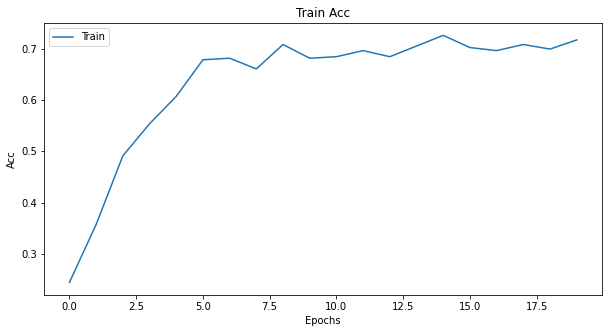

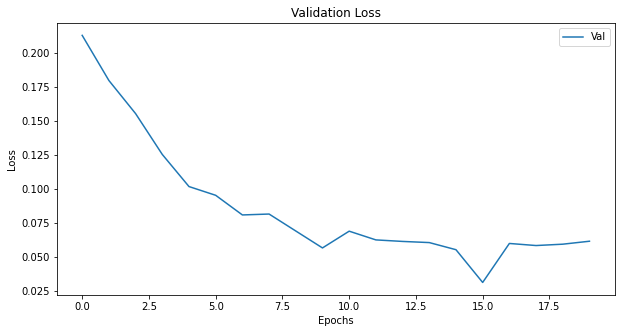

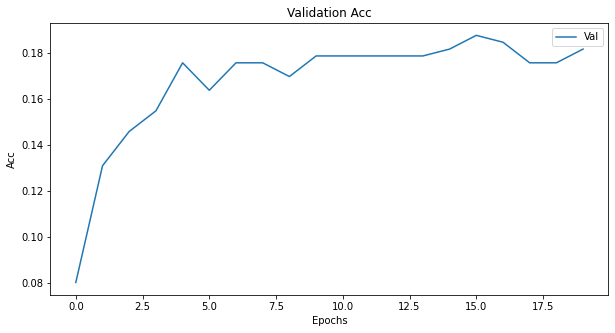

Model has been loaded
<All keys matched successfully>
Result tensor(83., device='cuda:0')


In [ ]:
model_ft=create_model('Grape')

**TOMATO DISEASE DETECTION MODEL**
=================================================

This dataset contains 3 classes of grape diseases:
1. Tomato___Septoria_leaf_spot
2. Tomato___Spider_mites Two-spotted_spider_mite
3. Tomato___Tomato_Yellow_Leaf_Curl_Virus

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


train Loss: 0.8282 Acc: 0.3443
val Loss: 0.1757 Acc: 0.1329

Epoch 2/20
----------
train Loss: 0.6955 Acc: 0.5181
val Loss: 0.1348 Acc: 0.1667

Epoch 3/20
----------
train Loss: 0.5328 Acc: 0.6313
val Loss: 0.1035 Acc: 0.1690

Epoch 4/20
----------
train Loss: 0.4198 Acc: 0.6698
val Loss: 0.0786 Acc: 0.1714

Epoch 5/20
----------
train Loss: 0.3458 Acc: 0.6769
val Loss: 0.0664 Acc: 0.1785

Epoch 6/20
----------
train Loss: 0.3014 Acc: 0.6958
val Loss: 0.0638 Acc: 0.1753

Epoch 7/20
----------
train Loss: 0.2977 Acc: 0.6785
val Loss: 0.0492 Acc: 0.1887

Epoch 8/20
----------
train Loss: 0.2513 Acc: 0.7107
val Loss: 0.0497 Acc: 0.1816

Epoch 9/20
----------
train Loss: 0.2230 Acc: 0.7225
val Loss: 0.0425 Acc: 0.1855

Epoch 10/20
----------
train Loss: 0.2301 Acc: 0.7146
val Loss: 0.0579 Acc: 0.1777

Epoch 11/20
----------
train Loss: 0.2393 Acc: 0.7075
val Loss: 0.0539 Acc: 0.1792

Epoch 12/20
----------
train Loss: 0.2145 Acc: 0.7264
val Loss: 0.0441 Acc: 0.1824

Epoch 13/20
----------


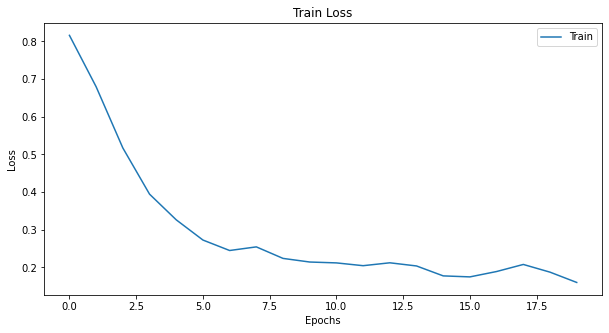

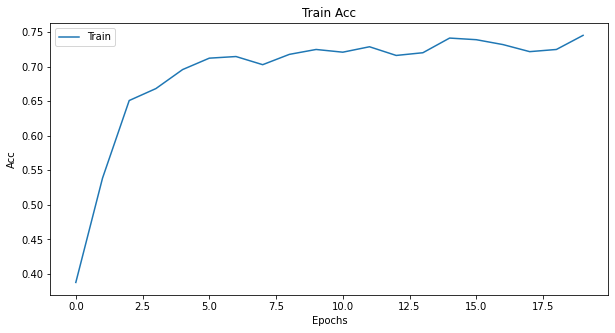

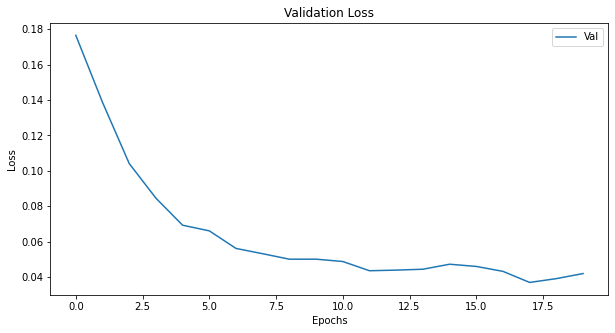

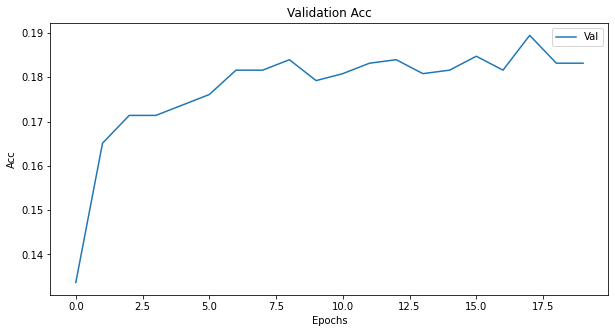

Model has been loaded
<All keys matched successfully>
Result tensor(297., device='cuda:0')


In [ ]:
model_ft=create_model('Tomato')